In [11]:
import pandas as pd
df = pd.read_csv("cardata.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
df.shape

(301, 9)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [14]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [15]:
#checking null values
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [16]:
#checking unique values in categorical features
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [17]:
df['Present'] = 2020
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Present
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [18]:
df['Year_of_Used'] = df['Present'] - df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Present,Year_of_Used
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [19]:
df = df.drop(['Car_Name','Year','Present'],axis=1)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year_of_Used
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [20]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Year_of_Used,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


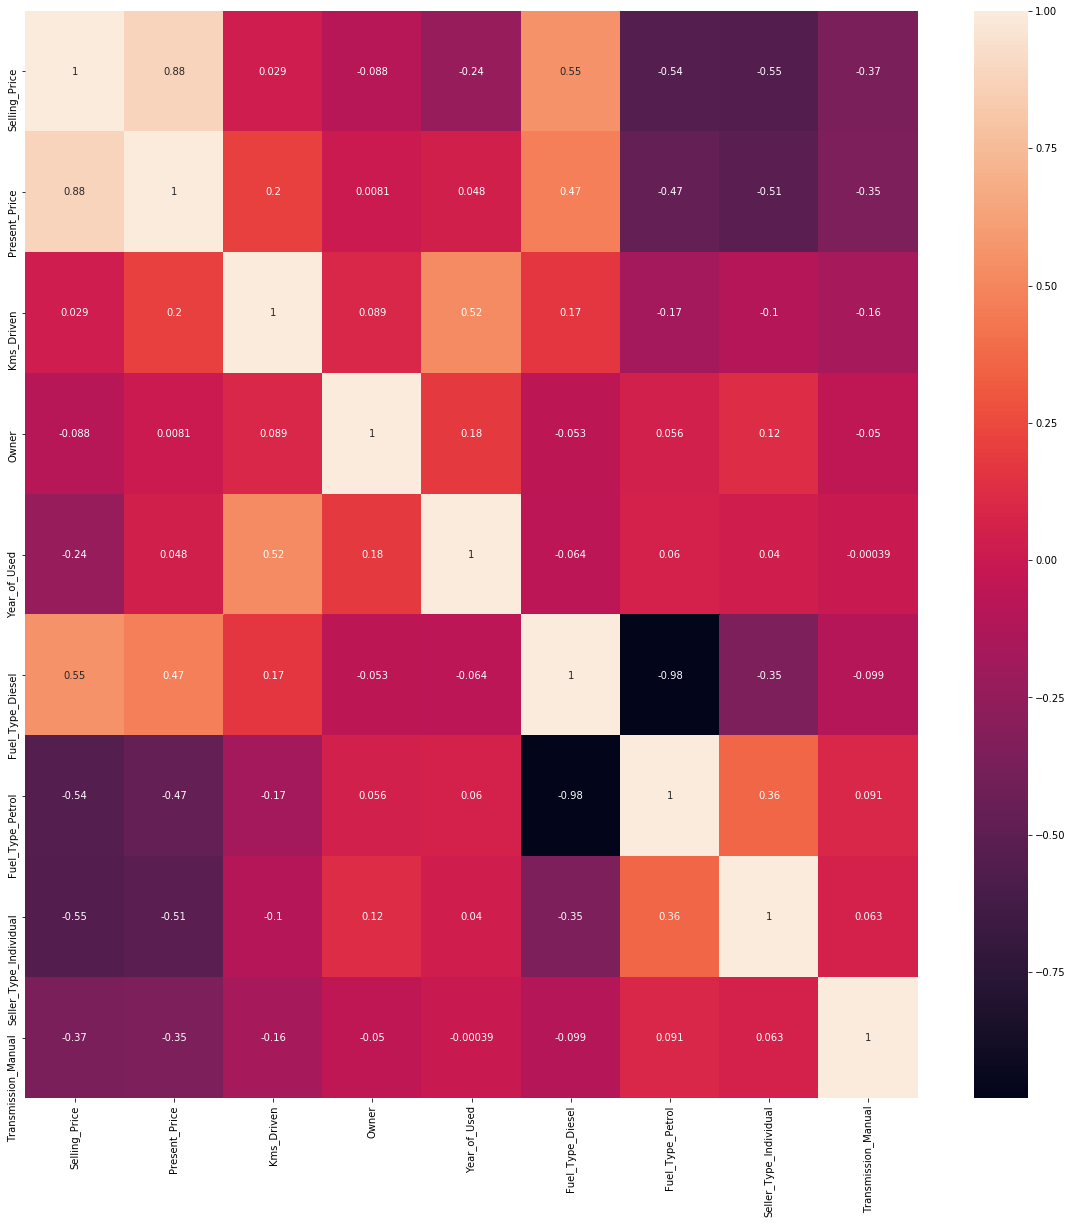

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
corr_feature = df.corr().index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[corr_feature].corr(),annot=True)


In [22]:
#independent feature
X = df.iloc[:,1:]
X.head()

,Present_Price,Kms_Driven,Owner,Year_of_Used,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [23]:
#dependent feature
y = df.iloc[:,0]
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [24]:
#feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [25]:
print(model.feature_importances_)

[3.40209885e-01 4.08203042e-02 3.22449101e-04 7.37203390e-02
 2.41171924e-01 1.36572759e-02 1.38729228e-01 1.51368595e-01]


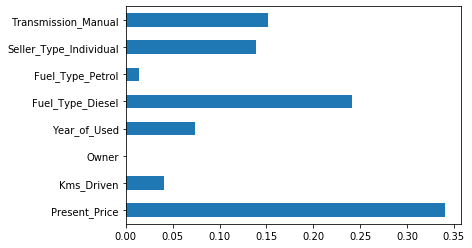

In [26]:
#graph for feature importance
feature_importances = pd.Series(model.feature_importances_,index=X.columns)
feature_importances.plot(kind='barh')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [28]:
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor()

In [29]:
#hyperparameter tuming
n_estimators = [int(i) for i in range(100,1000,100)]
max_features = ['auto','sqrt']
max_depth = [int(i) for i in range(5,50,5)]
min_samples_split = [2,5,10,15]
min_samples_leaf = [1,2,4,5,10]

param_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}
print(param_grid)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45], 'min_samples_split': [2, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 5, 10]}


In [30]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = random, param_distributions = param_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [31]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=45 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=45, total=   1.0s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=45 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=45, total=   0.9s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=45 
[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=45, total=   1.0s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=45 
[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=45, total=   1.0s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=45 
[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=45, total=   0.9s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=15 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=15, total=   0.9s
[CV] n_estimators=600, min_samples_split=15, min_s

[CV]  n_estimators=800, min_samples_split=15, min_samples_leaf=4, max_features=auto, max_depth=10, total=   1.3s
[CV] n_estimators=800, min_samples_split=15, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=800, min_samples_split=15, min_samples_leaf=4, max_features=auto, max_depth=10, total=   1.1s
[CV] n_estimators=800, min_samples_split=15, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=800, min_samples_split=15, min_samples_leaf=4, max_features=auto, max_depth=10, total=   1.4s
[CV] n_estimators=800, min_samples_split=15, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=800, min_samples_split=15, min_samples_leaf=4, max_features=auto, max_depth=10, total=   1.2s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=   0.8s
[CV] n_estimators=600, min_samples_split=5,

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   42.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [32]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [33]:
predictions = rf_random.predict(X_test)
predictions

array([ 5.41867648,  6.77956292,  4.60631026,  0.44922438,  3.06394844,
        6.80386326,  4.34617127,  1.14861487,  0.25782995,  4.37148479,
        0.22625162,  0.4712797 ,  6.28965379,  3.77249766,  1.14196132,
        4.59827573,  4.43497293,  9.12507817,  2.64391409,  5.18784012,
        4.45870886,  2.43039707,  0.31165035,  0.60364555,  9.99212349,
        8.09685531,  5.07957057,  3.74148326,  1.2054555 ,  1.21008046,
        7.82653402,  0.59480988,  7.16301312,  6.56813704,  5.27694439,
        0.54415395,  3.63883299,  0.34066289, 14.60291559,  0.25190094,
        1.11319621,  3.89950613,  0.55246868,  0.57148752,  7.09840666,
        0.65100474,  6.6594134 ,  1.09976951,  2.6968589 ,  5.59177912,
        1.41676735,  0.58084561,  6.2108671 ,  2.76294002,  7.86765953,
        3.21093824,  1.01909127,  2.58677922,  4.81698918,  7.1261685 ,
        6.51243712,  5.79288373,  7.99623635,  0.51073519,  7.70702817,
        4.31183158,  0.24671954,  4.74451917,  0.45547029,  6.73

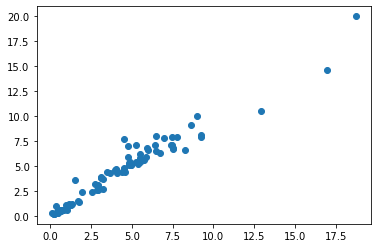

In [34]:
plt.scatter(y_test,predictions)

In [35]:
import pickle
file = open("random_forest_regressor_model.pkl","wb")
pickle.dump(rf_random,file)